## CST 383 - Project
Brandon Hazelton

Kevin Helm

Jasper Dolar

Yi-Onni Redmon

## Project progress report
* Choice of dataset
* What it is you are going to predict
* What features you plan to use as predictors
* Some preprocessing
* Some exploration and visualization
* Preliminary work on machine learning; such as test/train  dataset split
* Professor's feedback
* Final Report

# 1. Choice of Dataset:
Death Rates for Suicide, by sex, race, 
Hispanic origin, and age: United States
Source: `https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1`

## 2. What is it you are going to predict?
* We aim to predict and identify Hispanic age groups with increasing trends in suicide rates
over time, based on historical data, to highlight high-risk populations.

## 3. What features do you plan to use as predictors?
* YEAR
* STUB_NAME (may correspond to sex, race, and Hispanic origin)
* AGE

## 4. Some preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [5]:
# Check for missing values

df.isnull().sum()

INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64

In [6]:
# Explore unique values in STUB_NAME and AGE to understand categorization

df['STUB_NAME'].unique()

array(['Total', 'Sex', 'Sex and race', 'Sex and race and Hispanic origin',
       'Sex and race (Single race)',
       'Sex and race and Hispanic origin (Single race)', 'Age',
       'Sex and age', 'Sex, age and race',
       'Sex, age and race and Hispanic origin',
       'Sex, age and race (Single race)',
       'Sex, age and race and Hispanic origin (Single race)'],
      dtype=object)

In [7]:
df['AGE'].unique()

array(['All ages', '10-14 years', '15-24 years', '15-19 years',
       '20-24 years', '25-44 years', '25-34 years', '35-44 years',
       '45-64 years', '45-54 years', '55-64 years', '65 years and over',
       '65-74 years', '75-84 years', '85 years and over'], dtype=object)

In [8]:
# Data Cleaning And Preparation
# - missing values handling, if necessary
# Ensure correct data types, use "coerce" to force pandas to use NaN if cannot be converted

df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['YEAR']

0       1950
1       1960
2       1970
3       1980
4       1981
        ... 
6385    2018
6386    2018
6387    2018
6388    2018
6389    2018
Name: YEAR, Length: 6390, dtype: int64

In [9]:
# Categorizing and Grouping Data
# Assuming "ESTIMATE" column holds the suicide rates
# Then let's calculate year-over-year change within each group defined by
# STUB_NAME and AGE

# Ensure data is sorted
df.sort_values(by=['STUB_NAME', 'AGE', 'YEAR'], inplace=True) 

# Calculate year-over-year change
df['YoY_Change'] = df.groupby(['STUB_NAME', 'AGE'])['ESTIMATE'].diff()

df[['YEAR', 'STUB_NAME', 'AGE', 'ESTIMATE', 'YoY_Change']].head(20)



,YEAR,STUB_NAME,AGE,ESTIMATE,YoY_Change
854,1950,Age,10-14 years,0.3,NaN
855,1960,Age,10-14 years,0.5,0.2
856,1970,Age,10-14 years,0.6,0.1
857,1980,Age,10-14 years,0.8,0.2
858,1981,Age,10-14 years,0.9,0.1
859,1982,Age,10-14 years,1.1,0.2
860,1983,Age,10-14 years,1.1,0.0
861,1984,Age,10-14 years,1.3,0.2
862,1985,Age,10-14 years,1.6,0.3
863,1986,Age,10-14 years,1.5,-0.1


In [10]:
# Identify increasing trends
# - this can be implied from consistently positive changes 
# - or an overall positive average change over the years

positive_trend_groups = df.groupby(['STUB_NAME', 'AGE'])['YoY_Change'].mean().reset_index()
positive_trend_groups = positive_trend_groups[positive_trend_groups['YoY_Change'] > 0]
print(positive_trend_groups)

                                STUB_NAME          AGE  YoY_Change
0                                     Age  10-14 years    0.063415
1                                     Age  15-19 years    0.212195
2                                     Age  15-24 years    0.243902
3                                     Age  20-24 years    0.273171
4                                     Age  25-34 years    0.207317
5                                     Age  25-44 years    0.153659
6                                     Age  35-44 years    0.095122
15                            Sex and age  10-14 years    0.013924
16                            Sex and age  15-19 years    0.020482
31       Sex and race and Hispanic origin     All ages    0.821978
47  Sex, age and race and Hispanic origin  15-24 years    0.555963
48  Sex, age and race and Hispanic origin  25-44 years    0.864317
49  Sex, age and race and Hispanic origin  45-64 years    1.368293
55                                  Total     All ages    0.01

## 5. Some Exploration and Visualization

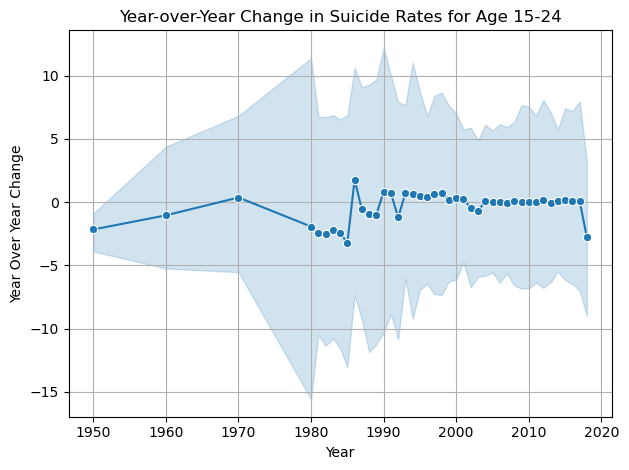

In [11]:
# Visualization

# Let's try visualizing trends for a particular demographic grouping
# Let's try age group "15-24 years" across all categories

age_group_data = df[df['AGE'] == '15-24 years']

# Plot
# Note: append/use ci=None [after marker param] to remove blue shade Confidence Interval default that shows on plot
sns.lineplot(data=age_group_data, x='YEAR', y='YoY_Change', marker='o') 
plt.title('Year-over-Year Change in Suicide Rates for Age 15-24')
plt.ylabel('Year Over Year Change')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Preliminary work on machine learning such as train/test dataset split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from math import sqrt

# Impute NaN values in 'ESTIMATE' - replace with median values
imputer = SimpleImputer(strategy = 'median')
df['ESTIMATE'] = imputer.fit_transform(df[['ESTIMATE']])

# Feature selection -- let's try using 'YEAR' as our feature and 'ESTIMATE' as our target
X = df[['YEAR']]
y = df['ESTIMATE']

# Split the data - with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and fit the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Model prediction
y_pred = knn_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 12.237372297645182


In [13]:
# Let's look at key stats
mean_estimate = df['ESTIMATE'].mean()
std_estimate = df['ESTIMATE'].std()
min_estimate = df['ESTIMATE'].min()
max_estimate = df['ESTIMATE'].max()

print(f"Mean of ESTIMATE: {mean_estimate}")
print(f"Standard Deviation of ESTIMATE: {std_estimate}")
print(f"Minimum of ESTIMATE: {min_estimate}")
print(f"Maximum of ESTIMATE: {max_estimate}")

Mean of ESTIMATE: 13.254710485133021
Standard Deviation of ESTIMATE: 10.741445275828548
Minimum of ESTIMATE: 0.3
Maximum of ESTIMATE: 74.8


###########################################################################

 Preliminary results from above
 
 Mean of ESTIMATE: 13.254710485133021
 
 Standard Deviation of ESTIMATE: 10.741445275828548
 
 Minimum of ESTIMATE: 0.3
 
 Maximum of ESTIMATE: 74.8

 Insights: 
 
 RMSE (12.24 is relatively close to the mean of ESTIMATE: 13.25) 
- implies moderate level of prediction error(?)
 
 Standard Deviation of 10.74 
- implies there is room for improvement

Since RMSE is comparable to the mean but exceeds the standard deviation, this 
implies that there is significant room for model improvement.  Enhancement that 
might be useful includes tuning parameters, trying different algorithms, or perhaps
incorporating new features.

## 7. PROFESSOR's FEEDBACK FROM UPDATE


In [14]:
# Comments: Is "ESTIMATE", the estimated death rate? 
# If so, maybe use MAE for evaluating your model. 
# That will preserve the units and analysis easier. 
# You can also create a baseline estimate, that is the mean, 
# just as you did for the homework, and compare it against that. 
# Are there any plots of correlations, etc. for the features? 
# Finally, please try a few more models and feature engineering 
# (i.e. poly features, etc.) for the final submission.

In [15]:
# Yes, 'ESTIMATE' is the estimated death rate.
# "Use MAE for evaluating your model"
# "That will preserve the units and analysis easier."

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

mae 

8.80150234741784

In [30]:
# MAE of approx 8.801 in the context of 100,000 individuals 
# implies the model is about that off from the actual suicide rate

In [31]:
# "You can also create a baseline estimate, that is the mean."

# Calculate the mean of the target variable from the training set
baseline_prediction_mean = y_train.mean()
# Create an array of baseline predictions using the mean, for the length of the test set
y_pred_baseline_mean = np.full(shape=y_test.shape, fill_value=baseline_prediction_mean)
# Calculate MAE for the baseline predictions
baseline_mae_mean = mean_absolute_error(y_test, y_pred_baseline_mean)

baseline_mae_mean

7.798234048701881

In [ ]:
# baseline_mae_mean is approx 7.798
# implies that the baseline model is off by about 7.798 from
# the true suicide rate

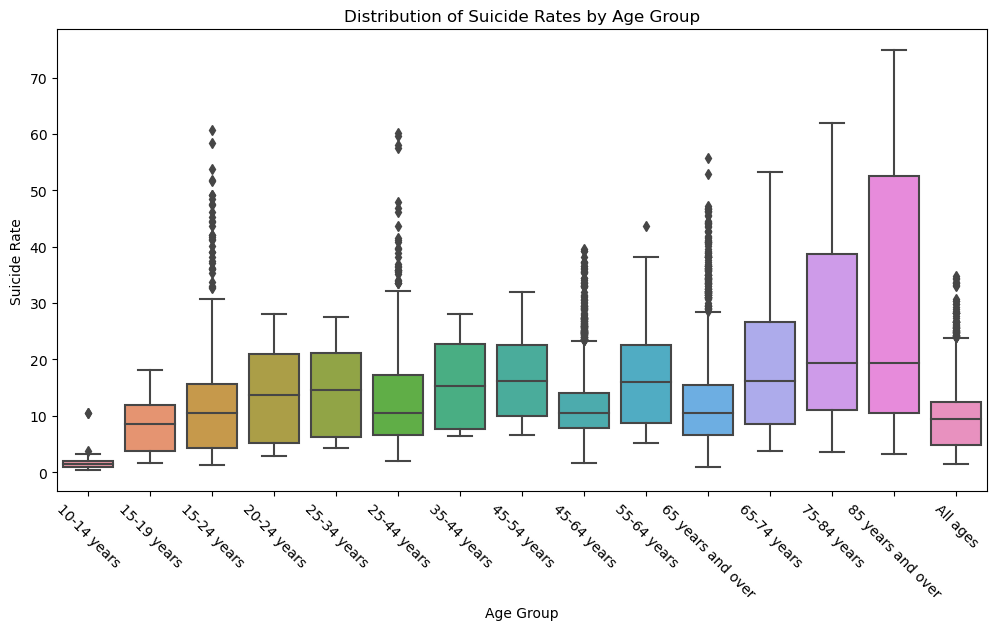

In [24]:
# "Are there any plots of correlations, etc. for the features?"
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE', y='ESTIMATE', data=df)
plt.title('Distribution of Suicide Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate')

# Rotates the labels on the x-axis for better readability
plt.xticks(rotation=-45)  

plt.show()

In [26]:
# Based on the plot above:
#
# * The line within each box represents the median suicide rate 
#   for each group
# * Interquartile Range (IQR): is the height of each box 
#   indicating where the middle 50% of data points lie.
# * Outliers: the points above and below the boxes represent the
#   suicide rates that fall significantly higher or lower than
#   the rest of the data in each age group. 
# * Whiskers: extending from the boxes indicate the range of the
#   data.  85 years and over, for example, has very long upper 
#   whiskers implying there is a significant spread towards higher
#   suicide rates
# * Comparison Across Age Groups: Data suggests when comparing 
#   across age groups, the spread and median of suicide rates
#   appear to increase with age, especially after 55 years of age
# * Young age groups, especially 10-14 years category, has a very
#   low median and narrow Interquartile Range indicating low 
#   suicide rates.

# ""Are there any plots of correlations, etc. for the features?"
# * Yes, Overall impression: the "All Ages" category has 
#   a wide-spread and lower median compared to the oldest 
#   age groups, which suggests that when all ages are 
#   considered, the overall suicide rate is lower than that 
#   of the highest-risk age groups.


In [80]:
# "Finally, please try a few more models and feature engineering" 
# (i.e. poly features, etc.) for the final submission.

# Lineear Regression with Polynomial Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Let's use 'YEAR' as our feature 
# and convert it into a polynomial feature
X = df[['YEAR']]

# Create polynomial features
poly_degree = 2  # Quadratic relationship
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data with polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_lin_reg = lin_reg.predict(X_test_poly)

# Evaluate the model using MAE
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)

mae_lin_reg

7.8131951469958905

In [ ]:
# mae for linear regression = 7.813
# implies weak predictive accuracy

In [93]:
# Let's try Decision Tree model
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Fit the model to the data
dt_reg.fit(X_train, y_train)  # Note that we use the original features, not polynomial

# Predict on the test set
y_pred_dt = dt_reg.predict(X_test)

# Calculate MAE for the Decision Tree predictions
mae_dt = mean_absolute_error(y_test, y_pred_dt)

mae_dt

7.791545263870313

In [ ]:
# mae from decision tree is also has a week
# predictive accuracy

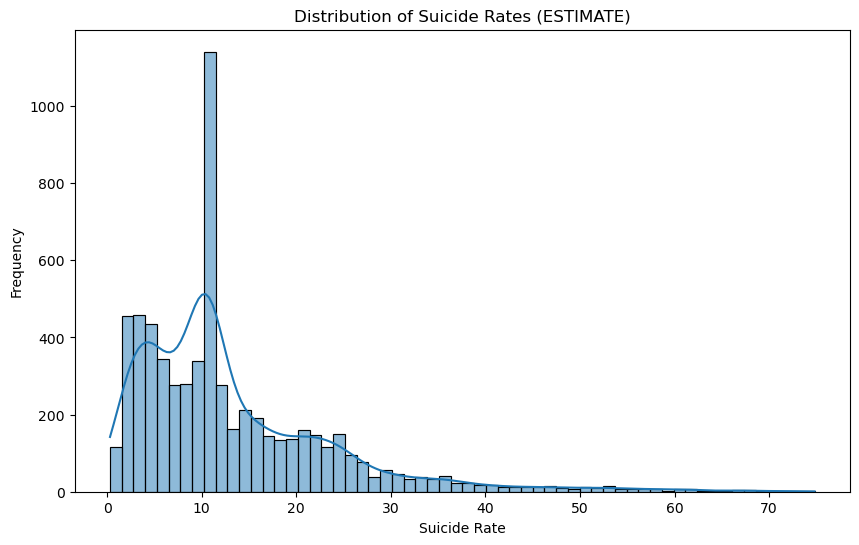

In [36]:
# Let's look at data distribution. .
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['ESTIMATE'], kde=True)
plt.title('Distribution of Suicide Rates (ESTIMATE)')
plt.xlabel('Suicide Rate')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Check for missing values in the dataset
print(df.isnull().sum())


INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE             0
FLAG              5484
YoY_Change        1446
dtype: int64


In [91]:
# Let's try Decision Tree model with Hyperparameter Tuning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Best model
best_tree = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best_tree = best_tree.predict(X_test)

# Calculate MAE for the best model
mae_best_tree = mean_absolute_error(y_test, y_pred_best_tree)

# print(f"Best hyperparameters: {best_params}")
print(f"MAE for Best Decision Tree: {mae_best_tree}")


MAE for Best Decision Tree: 7.791545263870313


In [88]:
# Out of the 3 models we tried, the Decision Tree Model
# has the lowest approx MAE: 7.791

In [97]:
# Let's try predicting suicide rates given a year,
# using the Decision Tree model right above

# Specify the year you want to predict
year_input = 2020

# Create a DataFrame for the year you want to predict
year_to_predict_df = pd.DataFrame({'YEAR': [year_input]})

# Use the trained Decision Tree to make a prediction
predicted_suicide_rate_dt = dt_reg.predict(year_to_predict_df)

# Since predicted_suicide_rate_dt is an array, get the first element for the prediction
predicted_rate = predicted_suicide_rate_dt[0]

# Print the formatted output
print(f"Predicted suicide rate for {year_input} is {predicted_rate}")

Predicted suicide rate for 2020 is 14.42027027027028


In [ ]:
# Decision Tree Model above does not quite predict beyond 2018 

In [86]:
# Let's try the Linear Regression model with Polynomial Features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define X and y based on 'YEAR' and 'ESTIMATE'
X = df[['YEAR']]  
y = df['ESTIMATE']

# Create polynomial features with 
# include_bias=False to match training
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform 'X' to polynomial features; 
# this also retains feature names in a DataFrame
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(input_features=X.columns))

# Split the data 
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Train the Linear Regression model with polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Specify the year you want to predict and transform it to 
# polynomial features

# Change year_input 
year_input = 2026  # Example year
####################
year_to_predict_df = pd.DataFrame({'YEAR': [year_input]})
year_to_predict_poly = poly.transform(year_to_predict_df)
year_to_predict_poly_df = pd.DataFrame(year_to_predict_poly, columns=poly.get_feature_names_out(input_features=['YEAR']))

# Predict using the trained model
predicted_suicide_rate = lin_reg.predict(year_to_predict_poly_df)

# Calculate and display MAE
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
print(f"Mean Absolute Error (MAE): {mae_lin_reg}")

# Print the prediction
print(f"Predicted suicide rate for {year_input} is {predicted_suicide_rate[0]}")


Mean Absolute Error (MAE): 7.8131951469958905
Predicted suicide rate for 2026 is 13.289635674596866


In [115]:
# More Visualizations

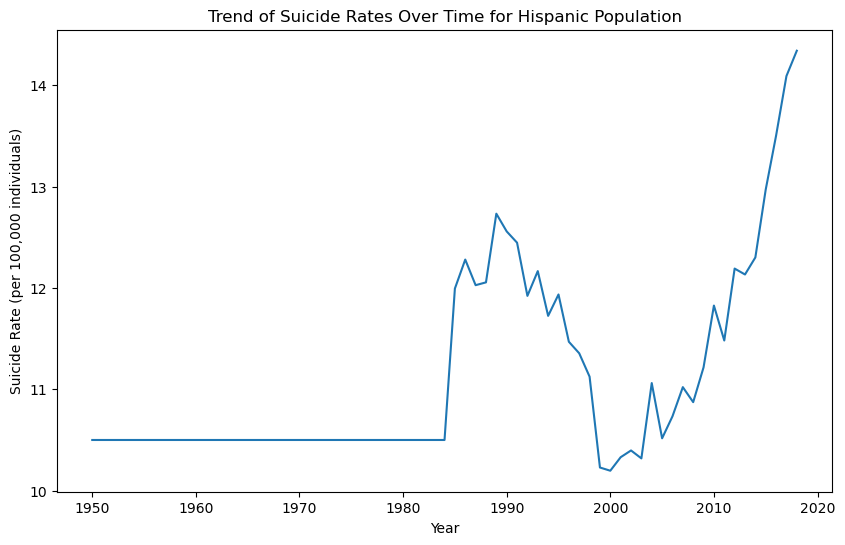

In [117]:
# Trend Over Time
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Hispanic Population
hispanic_df = df[df['STUB_NAME'].str.contains("Hispanic", case=False, na=False)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=hispanic_df, x='YEAR', y='ESTIMATE', estimator='mean', errorbar=None)
plt.title('Trend of Suicide Rates Over Time for Hispanic Population')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100,000 individuals)')
plt.show()

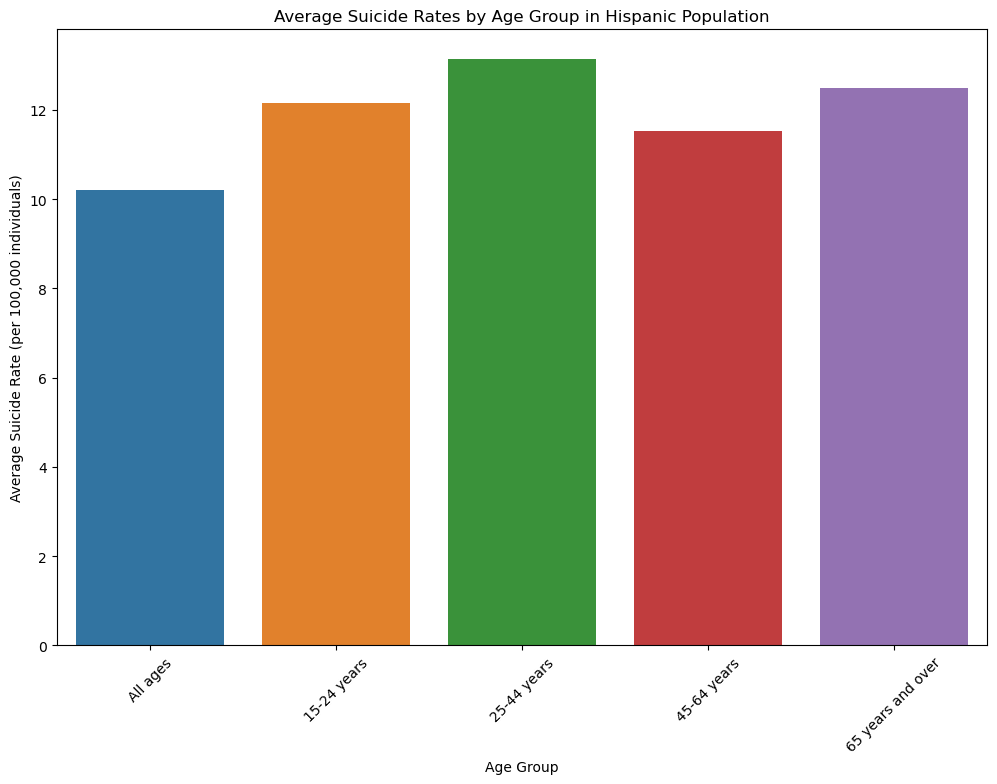

In [120]:
# Age Group Comparison

# Filter for Hispanic Population
hispanic_df = df[df['STUB_NAME'].str.contains("Hispanic", case=False, na=False)]

plt.figure(figsize=(12, 8))
sns.barplot(data=hispanic_df, x='AGE', y='ESTIMATE', errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Suicide Rates by Age Group in Hispanic Population')
plt.xlabel('Age Group')
plt.ylabel('Average Suicide Rate (per 100,000 individuals)')
plt.show()

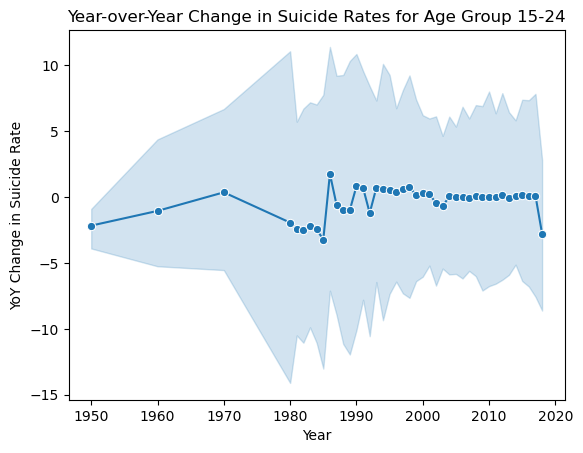

In [121]:
# Year-Over-Year Change

# Filter for Hispanic Population
hispanic_df = df[df['STUB_NAME'].str.contains("Hispanic", case=False, na=False)]

high_risk_age_group = df[df['AGE'] == '15-24 years']  # Example age group

sns.lineplot(data=high_risk_age_group, x='YEAR', y='YoY_Change', marker='o')
plt.title('Year-over-Year Change in Suicide Rates for Age Group 15-24')
plt.xlabel('Year')
plt.ylabel('YoY Change in Suicide Rate')
plt.show()


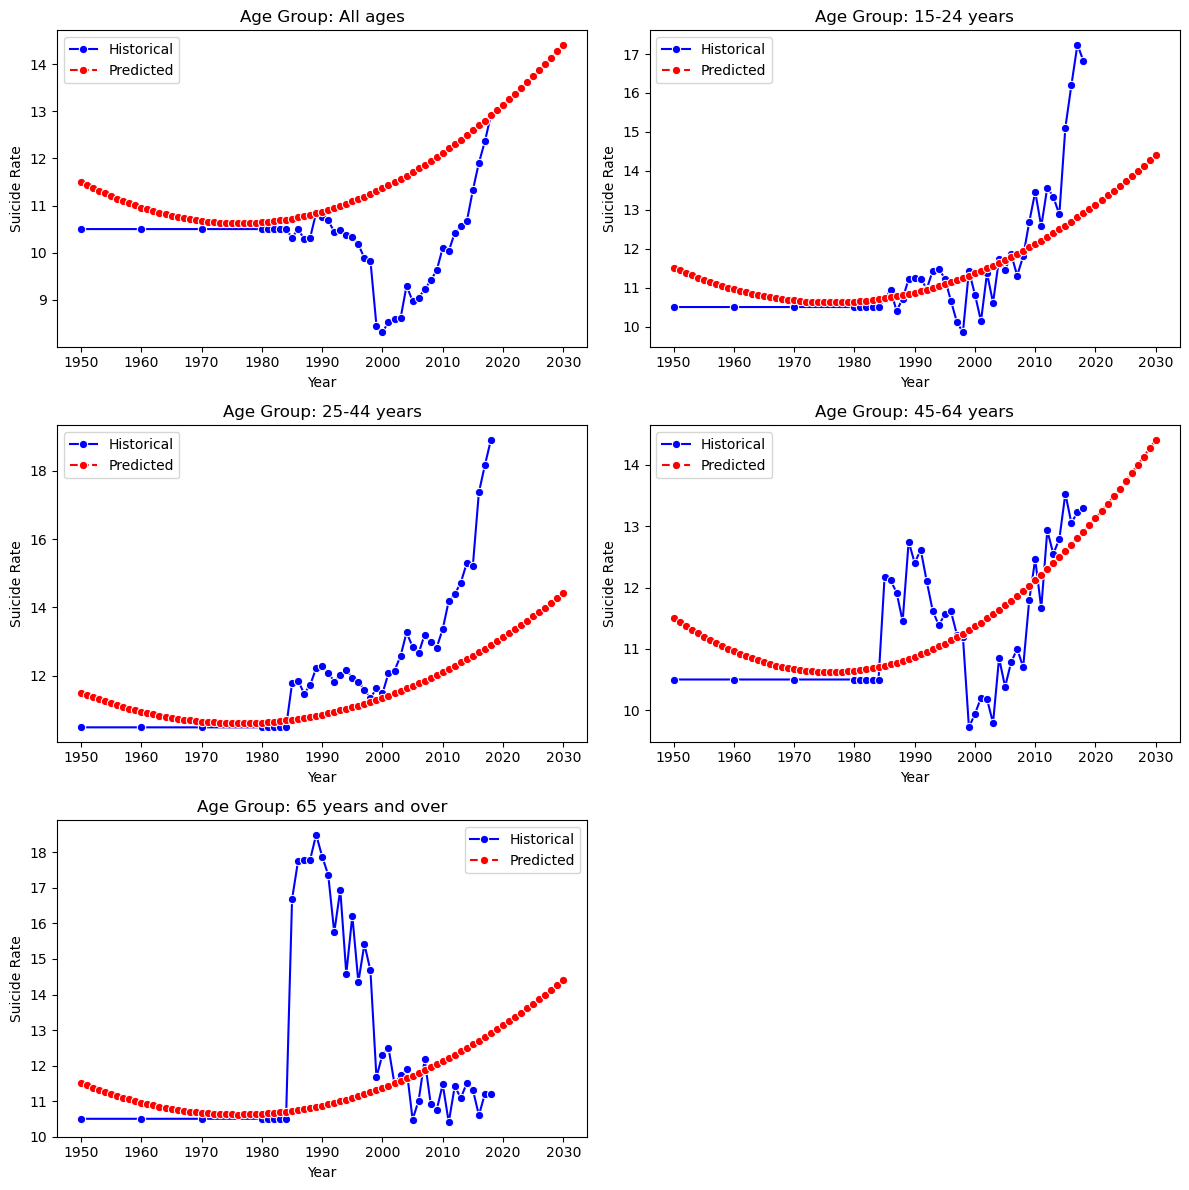

In [124]:
# Prediction up to 2030 using Linear Regression model with Polynomial Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Filter df for the Hispanic population
hispanic_df = df[df['STUB_NAME'].str.contains("Hispanic", case=False, na=False)]

# Define X and y based on 'YEAR' and 'ESTIMATE' for the Hispanic population
X = hispanic_df[['YEAR']]
y = hispanic_df['ESTIMATE']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['YEAR']))

# Train the Linear Regression model with polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly_df, y)

# Generate years from the earliest in the dataset to 2030, ensuring it's in a DataFrame with the correct column name
years_df = pd.DataFrame({'YEAR': np.arange(hispanic_df['YEAR'].min(), 2031)})

# Transform these years to polynomial features for prediction.
# Ensure the transformed features are in a DataFrame with the feature names expected by the model.
years_poly = poly.transform(years_df)
years_poly_df = pd.DataFrame(years_poly, columns=poly.get_feature_names_out(['YEAR']))

predictions = lin_reg.predict(years_poly_df)

# Create a DataFrame for the predictions with the correct years and estimated values
predictions_df = pd.DataFrame({'YEAR': years_df['YEAR'], 'ESTIMATE': predictions})


# Determine the layout for the grid of plots
unique_age_groups = hispanic_df['AGE'].unique()
n_cols = 2  # Number of columns in the grid
n_rows = (len(unique_age_groups) + 1) // n_cols  # Calculate rows, ensuring all plots fit

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing

# Flatten axes array and iterate over each unique age group for plotting
axes_flat = axes.flatten()

for i, age_group in enumerate(unique_age_groups):
    age_group_df = hispanic_df[hispanic_df['AGE'] == age_group]
    sns.lineplot(ax=axes_flat[i], data=age_group_df, x='YEAR', y='ESTIMATE', label='Historical', marker='o', color='blue', errorbar=None)
    sns.lineplot(ax=axes_flat[i], data=predictions_df, x='YEAR', y='ESTIMATE', label='Predicted', marker='o', linestyle='--', color='red', errorbar=None)
    axes_flat[i].set_title(f'Age Group: {age_group}')
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Suicide Rate')
    axes_flat[i].legend()

# Turn off any unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()
plt.show()



## 8. FINAL REPORT

## Introduction 

In [101]:
# Why was the project undertaken?
# What was the research question, the tested hypothesis, or the
# purpose of the research?

In [103]:
# < Answer here >

## Selection of Data

In [104]:
# What is the source of the dataset?  Characteristics of data?
# Any munging or feature engineering?

In [105]:
# < Answer here >

## Methods

In [107]:
# What materials/APIs/tools were used or who was included in 
# answering the research question?

In [108]:
# < Answer here >

## Results

In [109]:
# What answer was found to the research question; 
# what did the study find? 
# Was the tested hypothesis true? Any visualizations?

In [110]:
# < Answer here >

## Discussion

In [111]:
# What might the answer imply and why does it matter? 
# How does it fit in with what other researchers have found? 
# What are the perspectives for future research? 
# Survey about the tools investigated for this assignment.

In [112]:
# < Answer here >

## Summary

In [113]:
# Most important findings

In [114]:
# < Answer here >